In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv(r'screen_time.csv')

In [7]:
df.head()

,Age,Gender,Screen Time Type,Day Type,Average Screen Time (hours),Sample Size
0,5,Male,Educational,Weekday,0.44,500
1,5,Male,Recreational,Weekday,1.11,500
2,5,Male,Total,Weekday,1.55,500
3,5,Male,Educational,Weekend,0.50,500
4,5,Male,Recreational,Weekend,1.44,500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          198 non-null    int64  
 1   Gender                       198 non-null    object 
 2   Screen Time Type             198 non-null    object 
 3   Day Type                     198 non-null    object 
 4   Average Screen Time (hours)  198 non-null    float64
 5   Sample Size                  198 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.4+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,198.0,10.00000,3.170294,5.00,7.0000,10.00,13.0000,15.00
Average Screen Time (hours),198.0,2.99303,1.922822,0.44,1.4025,2.49,4.3975,8.19
Sample Size,198.0,400.00000,63.405872,300.00,340.0000,400.00,460.0000,500.00


In [12]:
df['Gender'].value_counts()

Gender
Male                       66
Female                     66
Other/Prefer not to say    66
Name: count, dtype: int64

In [14]:
df['Screen Time Type'].value_counts()

Screen Time Type
Educational     66
Recreational    66
Total           66
Name: count, dtype: int64

In [16]:
df['Day Type'].value_counts()

Day Type
Weekday    99
Weekend    99
Name: count, dtype: int64

In [18]:
df['Sample Size'].value_counts()

Sample Size
500    18
480    18
460    18
440    18
420    18
400    18
380    18
360    18
340    18
320    18
300    18
Name: count, dtype: int64

In [20]:
df.isna().sum()

Age                            0
Gender                         0
Screen Time Type               0
Day Type                       0
Average Screen Time (hours)    0
Sample Size                    0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [33]:
df

,Age,Gender,Screen Time Type,Day Type,Average Screen Time (hours),Sample Size
0,5,Male,Educational,Weekday,0.44,500
1,5,Male,Recreational,Weekday,1.11,500
2,5,Male,Total,Weekday,1.55,500
3,5,Male,Educational,Weekend,0.50,500
4,5,Male,Recreational,Weekend,1.44,500
...,...,...,...,...,...,...
193,15,Other/Prefer not to say,Recreational,Weekday,5.16,300
194,15,Other/Prefer not to say,Total,Weekday,6.50,300
195,15,Other/Prefer not to say,Educational,Weekend,2.19,300
196,15,Other/Prefer not to say,Recreational,Weekend,5.77,300


<Axes: xlabel='Screen Time Type', ylabel='Count'>

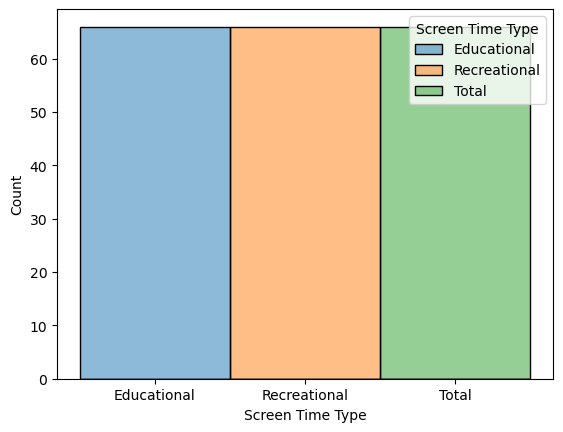

In [36]:
sns.histplot(data=df,x = 'Screen Time Type', hue = 'Screen Time Type')

In [37]:
df['Screen Time Type'].value_counts()

Screen Time Type
Educational     66
Recreational    66
Total           66
Name: count, dtype: int64

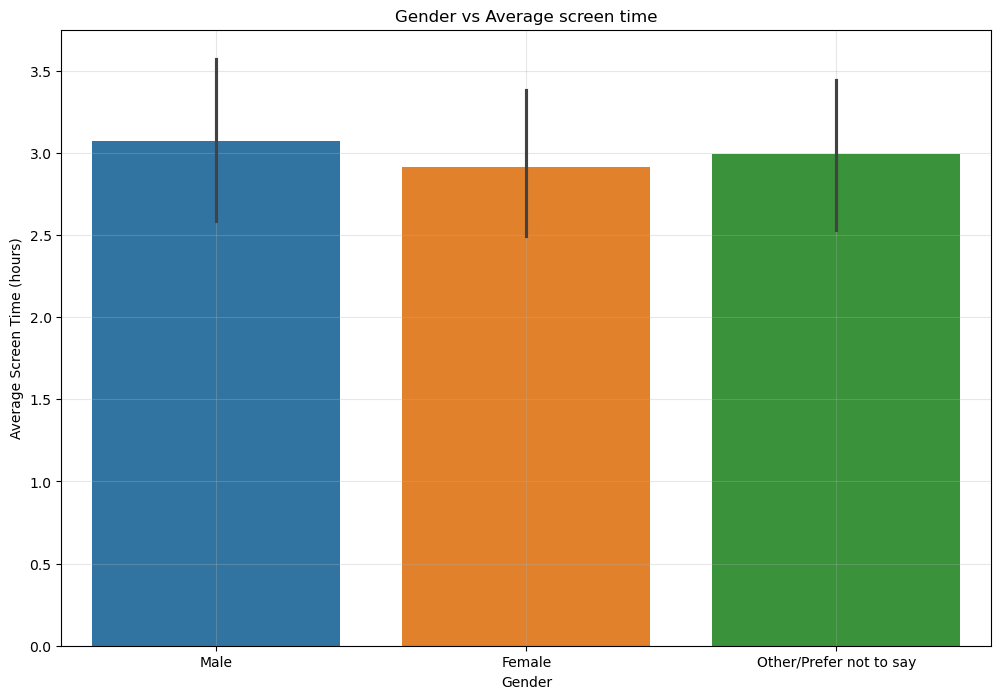

In [44]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Gender', y='Average Screen Time (hours)', hue='Gender')
plt.title('Gender vs Average screen time')
plt.grid(True, alpha=0.3)
plt.show()

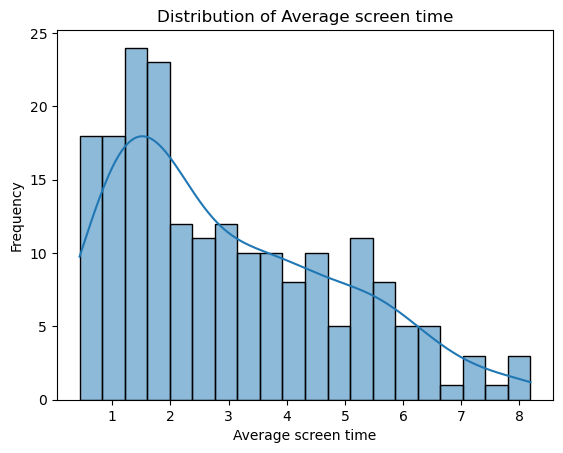

In [47]:
sns.histplot(df['Average Screen Time (hours)'], kde=True, bins=20)
plt.xlabel('Average screen time')
plt.ylabel('Frequency')
plt.title('Distribution of Average screen time')
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

df['Gender'] = le.fit_transform(df['Gender'])



In [61]:
df.head()

,Age,Gender,Screen Time Type,Day Type,Average Screen Time (hours),Sample Size
0,5,1,0,0,0.44,500
1,5,1,1,0,1.11,500
2,5,1,2,0,1.55,500
3,5,1,0,1,0.50,500
4,5,1,1,1,1.44,500


In [62]:
X= df.drop('Average Screen Time (hours)', axis=1)
y = df['Average Screen Time (hours)']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'RMSE': rmse,
        'R2 Score': r2
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='RMSE'))



               Model      RMSE  R2 Score
1      Random Forest  0.273795  0.982919
0  Linear Regression  0.661001  0.900447
